SVR - Support Vector Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("dataset/Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Feature scaling

In [7]:
#Reshape y vertically
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [8]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

In [9]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [10]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training the SVR model on the whole dataset

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(X, y)

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting a new result

In [13]:
scaler_y.inverse_transform(regressor.predict(scaler_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

Visualising the SVR results

Text(0, 0.5, 'Salary')

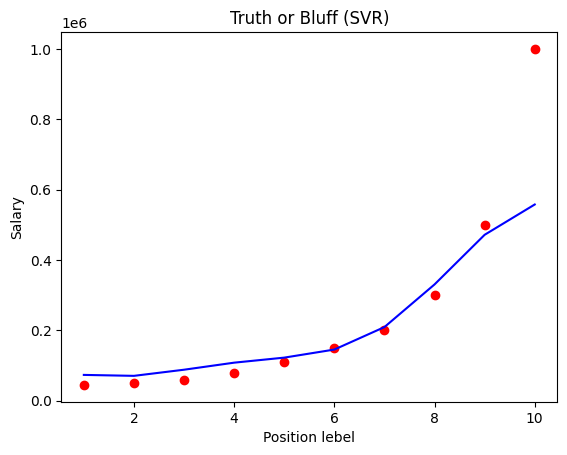

In [14]:
plt.scatter(scaler_X.inverse_transform(X), scaler_y.inverse_transform(y), color="red")
plt.plot(scaler_X.inverse_transform(X), scaler_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color="blue")
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position lebel")
plt.ylabel("Salary")

Evaluating the Model Performance

In [15]:
from sklearn.metrics import r2_score
r2_score(y, scaler_y.inverse_transform(regressor.predict(X).reshape(-1,1)))

-75289554857.61282